# ¿Tienen éxito?

Análisis de la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas.

El proyecto tiene que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.


Clasificación ESRB:

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

# Inicialización

In [ ]:
# Carga de todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from math import factorial
from scipy import stats as st
import math

In [ ]:
# Carga de archivos de datos
df = pd.read_csv('/datasets/games.csv')

## Analisis preliminar de nuestro conjunto de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2471,Metroid: Zero Mission,GBA,2004.0,Adventure,0.60,0.22,0.00,0.01,89.0,9,E
12909,Front Mission Evolved,PC,2010.0,Shooter,0.05,0.00,0.00,0.00,63.0,5.1,T
9882,Disney's Extreme Skate Adventure,GC,2003.0,Sports,0.09,0.02,0.00,0.00,76.0,7.6,E
15382,Tsuyo Kiss 2 Portable,PSP,2010.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
2899,Spider-Man 2,PSP,2005.0,Action,0.35,0.21,0.00,0.14,67.0,6.9,T


# Preparación de datos

## Formateo de datos

In [ ]:
# Le damos el mismo formato al nombre de las columnas
lower_columns = []
for clean_columns in df.columns:
    lower = clean_columns.lower()
    lower_columns.append(lower)

df.columns = lower_columns

In [ ]:
# Reemplazamos definición 'tbd' por 'NaN' para poder convertirlo a 'int'
df['user_score'] = df['user_score'].replace('tbd', 'NaN')

In [ ]:
# Cambio de tipo de datos a columnas necesarias
df['user_score'] = df['user_score'].astype('float')
df['year_of_release'] = df['year_of_release'].fillna(0).astype('int')

In [ ]:
# Modificamos la columna 'user_score' para que sea el mismo que la columna 'critic_score'
df['user_score'] = df['user_score']*10

In [ ]:
# Reemplazamos el rating 'k-a' ya que significa lo mismo que 'e'
df['rating'] = df['rating'].replace('K-A', 'E')

En la columna 'year_of_release' modificamos los valores ausentes por "0" para convertirlo a entero y deshacernos del decimal de cada año.

En la columna 'user_score' reemplazamos el dato "tbd" por "NaN" para poder convertir la columna en 'float' dado que es probable que necesitenmos trabajar con operacionees aritméticas y multiplicamos los resultados por "10" para poder tener el mismo formato en centenas de la columna 'critic_score' y 'user_score'.

In [ ]:
# Formateamos texto de columnas a minúsculas
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()
df['genre'] = df['genre'].str.lower()
df['rating'] = df['rating'].str.lower()

Formateamos toda la información de nuestro 'df' para trabajar de manera más limpia y facil.

## Tratamiento de valores ausentes

In [ ]:
# Revisamos valores ausentes
df.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [ ]:
# Reemplazo de valores ausentes
df['name'] = df['name'].fillna('unknown')
df['genre'] = df['genre'].fillna('unknown')
df['rating'] = df['rating'].fillna('unknown')

Reemplazamos los valores ausentes de las columnas 'name', 'genre' y 'rating' a "unknown" dado que son datos desconocidos para nosotrsos.

Y en las columnas criticr_score' y 'user_score' dejamos los valores ausentes como 'Nan' ya que no conocemos los valores reales y cambiarlos por media o mediana podría alterar los resultados del análisis.

## Enriquecimiento de datos

In [ ]:
# Agregamos y ordenamos columna con el total de ventas por juego
df['total_sales'] = df['na_sales'] + \
    df['eu_sales']+df['jp_sales']+df['other_sales']
df = df.reindex(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
                'jp_sales', 'other_sales', 'total_sales', 'critic_score', 'user_score', 'rating'], axis=1)

## Comprobación de modificaciones

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   total_sales      16715 non-null  float64
 9   critic_score     8137 non-null   float64
 10  user_score       7590 non-null   float64
 11  rating           16715 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [15]:
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
1385,colin mcrae rally 3,ps2,2002,racing,0.03,1.05,0.02,0.30,1.40,86.0,77.0,e
15895,pro rally,gc,2002,racing,0.01,0.00,0.00,0.00,0.01,64.0,NaN,e
4627,castlevania: curse of darkness,ps2,2005,action,0.18,0.14,0.05,0.05,0.42,70.0,75.0,m
13808,dragon's lair 3d: return to the lair,gc,2002,platform,0.03,0.01,0.00,0.00,0.04,NaN,NaN,unknown
8450,itoi shigesato no bass tsuri no. 1,snes,1997,sports,0.00,0.00,0.17,0.00,0.17,NaN,NaN,unknown


# Análisis de datos

## Consideramos los datos relevenates (plataformas y años de estudio)

In [ ]:
# Analizamos que años SI son relevantes
years_count = df.groupby('year_of_release')['name'].count()
# Creamos nuevo 'df' con solo datos de los años relevantes
df_relevant_years = df.query("year_of_release >= 1994")

print('A partir de 1994 los lanzamiento de videojuegos parecen relevantes con más de 100 al año.')

A partir de 1994 los lanzamiento de videojuegos parecen relevantes con más de 100 al año.


In [ ]:
# Elegimos las plataformas relevantes basado en sus ventas
platform_group = df_relevant_years.groupby('platform', as_index=False)
platform_sales = platform_group.agg({'total_sales': 'sum'})
df_relevant_platforms = platform_sales[platform_sales['total_sales'] > 100].sort_values(
    by='total_sales')

print('Las plataformas consideradas relevantes son las que tienen ventas totales mayores a 100 millones de dolares')
df_relevant_platforms.sort_values(by='total_sales', ascending=False)

Las plataformas consideradas relevantes son las que tienen ventas totales mayores a 100 millones de dolares


,platform,total_sales
14,ps2,1233.56
26,x360,961.24
15,ps3,931.34
23,wii,891.18
3,ds,802.76
13,ps,727.58
16,ps4,314.14
5,gba,312.88
17,psp,289.53
1,3ds,257.81


Consideramos como "plataformas relevantes" aquellas que consiguieron ingresos totales mayores a 100 millones de dólares.

La plataforma más exitosas por sus ventas totales hasta ahora son:
 - 1er Lugar: **ps2**.
 - 2do Lugar: **x360**.
 - 3er Lugar: **ps3**.


In [ ]:
# Creamos 'df' con los años y las plataformas relevantes
df_relevant_platform_years = df_relevant_years.query(
    "platform in @df_relevant_platforms['platform']")

## Plataformas con rentabilidad potencial

In [ ]:
# ¿Cúal es el promedio de vida de las plataformas?
group_relevant_platform_years = df_relevant_platform_years.groupby(
    ['platform', 'year_of_release'], as_index=False)
df_platform_years = group_relevant_platform_years.agg({'total_sales': 'sum'})
years_on_market = df_platform_years.groupby('platform', as_index=False)[
    'year_of_release'].count()
years_on_market_average = years_on_market['year_of_release'].mean().round(1)
print(
    f'El indice de vida promedio de una plataforma es de {years_on_market_average} años.')

El indice de vida promedio de una plataforma es de 9.6 años.


In [ ]:
# Investigamos si en el año '2016' la plataforma tuvo ingresos
sales_in_2016 = df_relevant_platform_years.query("year_of_release == 2016 and total_sales > 0").groupby(
    'platform', as_index=False)['total_sales'].sum()
sales_in_2016 = sales_in_2016['platform'].to_list()
print(f'Las plataformas que tienen ingresos en 2016 son: {sales_in_2016} .')

Las plataformas que tienen ingresos en 2016 son: ['3ds', 'pc', 'ps3', 'ps4', 'wii', 'x360', 'xone'] .


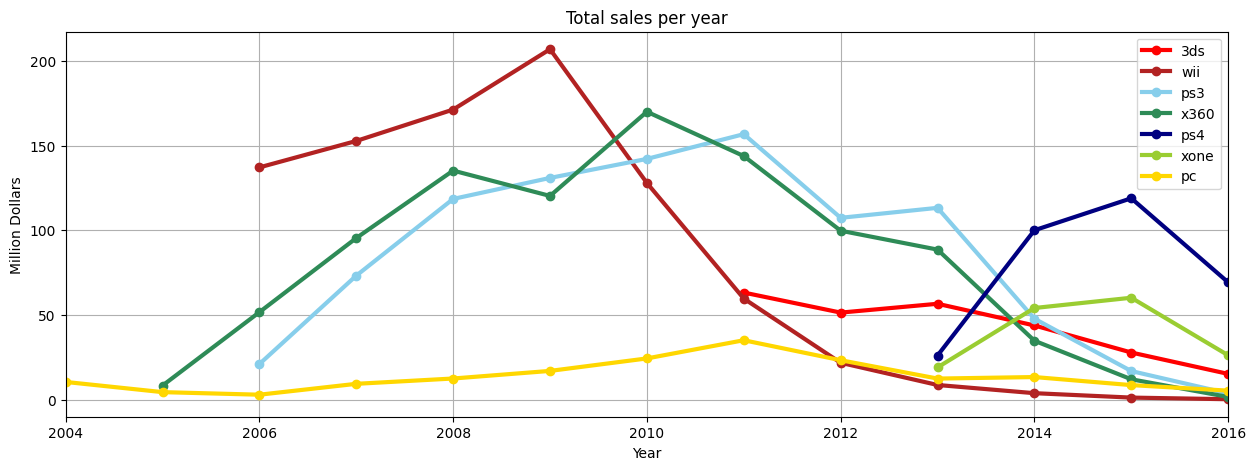

In [ ]:
# Creamos un nuevo df y graficamos para encontrar las plataformas con rentabilidad potencial
_3ds = df_relevant_platform_years.query("platform == '3ds'").groupby(
    'year_of_release')['total_sales'].sum()
pc = df_relevant_platform_years.query("platform == 'pc'").groupby(
    'year_of_release')['total_sales'].sum()
ps3 = df_relevant_platform_years.query("platform == 'ps3'").groupby(
    'year_of_release')['total_sales'].sum()
ps4 = df_relevant_platform_years.query("platform == 'ps4'").groupby(
    'year_of_release')['total_sales'].sum()
wii = df_relevant_platform_years.query("platform == 'wii'").groupby(
    'year_of_release')['total_sales'].sum()
x360 = df_relevant_platform_years.query("platform == 'x360'").groupby(
    'year_of_release')['total_sales'].sum()
xone = df_relevant_platform_years.query("platform == 'xone'").groupby(
    'year_of_release')['total_sales'].sum()
df_platforms_per_year = pd.concat(
    [_3ds, pc, ps3, ps4, wii, x360, xone], axis='columns')
df_platforms_per_year.columns = [
    '3ds', 'pc', 'ps3', 'ps4', 'wii', 'x360', 'xone']

df_platforms_per_year.plot(xlim=[2004, 2016], y=['3ds', 'wii', 'ps3', 'x360', 'ps4', 'xone', 'pc'], title='Total sales per year', xlabel='Year', ylabel='Million Dollars', figsize=[
                           15, 5], color=['red', 'firebrick', 'skyblue', 'seagreen', 'navy', 'yellowgreen', 'gold'], grid=True, marker='o', linewidth=3, rot=0)
plt.show()

Notas: 
- La tendencia del año 2016 en las ventas es descendiente porque el año está incompleto, téngase en cuenta la tendencia a partir del año 2015.
- Se consideran como "potenciales" aquellas plataformas que siguen vigentes.


Conclusión gráfiica: La tendencia indica claramente que las plataformas con mayor rentabilidad potencial son: **ps4 y xone** dado que son las más recientes. Pero aún siguen vendiendo un poco 'pc' y '3ds', por lo cual las consideraremos.


La media de 3ds es: 0.504 millones de dólares por juego.
La media de pc es: 0.266 millones de dólares por juego.
La media de ps4 es: 0.801 millones de dólares por juego.
La media de xone es: 0.645 millones de dólares por juego.


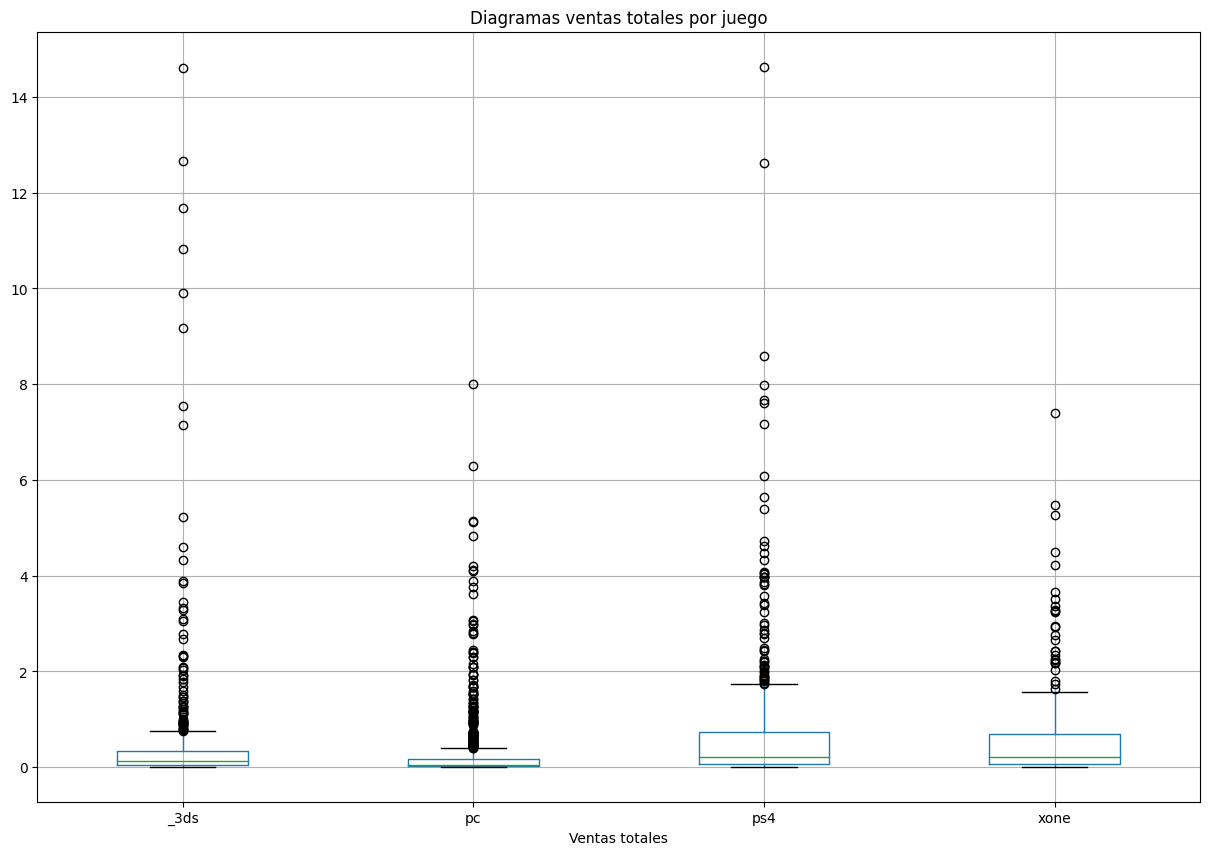

In [ ]:
# Trazamos diagrama de caja con las plataformas aún rentables
_3ds = df_relevant_platform_years.query("platform == '3ds'").groupby('name')[
    'total_sales'].sum()
pc = df_relevant_platform_years.query("platform == 'pc'").groupby('name')[
    'total_sales'].sum()
ps4 = df_relevant_platform_years.query("platform == 'ps4'").groupby('name')[
    'total_sales'].sum()
xone = df_relevant_platform_years.query("platform == 'xone'").groupby('name')[
    'total_sales'].sum()

print(
    f'La media de 3ds es: {_3ds.mean().round(3)} millones de dólares por juego.')
print(
    f'La media de pc es: {pc.mean().round(3)} millones de dólares por juego.')
print(
    f'La media de ps4 es: {ps4.mean().round(3)} millones de dólares por juego.')
print(
    f'La media de xone es: {xone.mean().round(3)} millones de dólares por juego.')

df_platforms_game = pd.concat([_3ds, pc, ps4, xone], axis='columns')
df_platforms_game.columns = ['_3ds', 'pc', 'ps4', 'xone']
box_df_platforms_game = df_platforms_game.boxplot(grid=True, figsize=[15, 10])

plt . title('Diagramas ventas totales por juego')
plt . xlabel('Ventas totales')
plt.show()

La plataforma 'ps4' tiene la media y las ventas por encima de 'xone' alrededor del 20%, aunque su estructura en el diagrama de caja es casi el mismo.

### Comportamiento de ventas dependiendo de las críticas

/tmp/ipykernel_71/1709170197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ps2['average_score'] = (df_ps2['critic_score'] + df_ps2['user_score']) / 2


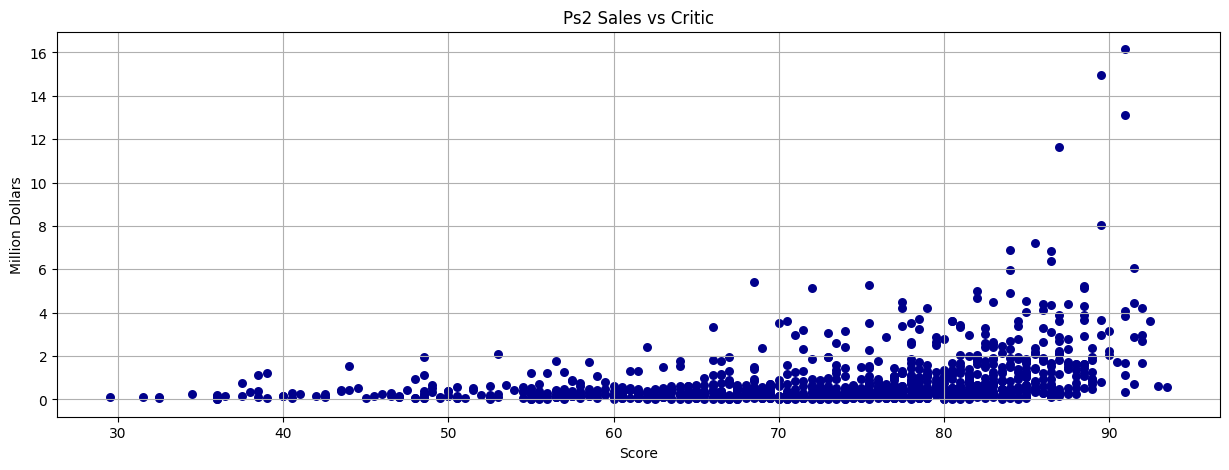

In [ ]:
# Creamos nuevo 'df' de "ps2" para analizar si las ventas se correlacionan con las criticas
df_ps2 = df_relevant_platform_years.query(
    "critic_score > 0 and user_score > 0 and platform == 'ps2' and total_sales < 20")
df_ps2['average_score'] = (df_ps2['critic_score'] + df_ps2['user_score']) / 2

ps2_average_score_sales = df_ps2.groupby(
    ['name', 'average_score'], as_index=False).agg({'total_sales': 'sum'})

ps2_average_score_sales.plot(x='average_score', y='total_sales', title='Ps2 Sales vs Critic', xlabel='Score',
                             ylabel='Million Dollars', figsize=[15, 5], grid=True, kind='scatter', linewidth=2, rot=0, color='darkblue')

plt.show()

"Nota: Se eligió la plataforma 'ps2' dado que es la de mayores ventas de la historia contiene mayor información."

La crítica del juego en la plataforma 'ps2' **sí** está correlacionada con sus ventas, se aprecia claramente la tendencia alcista.

## Ventas de videojuegos en diferentes plataformas 

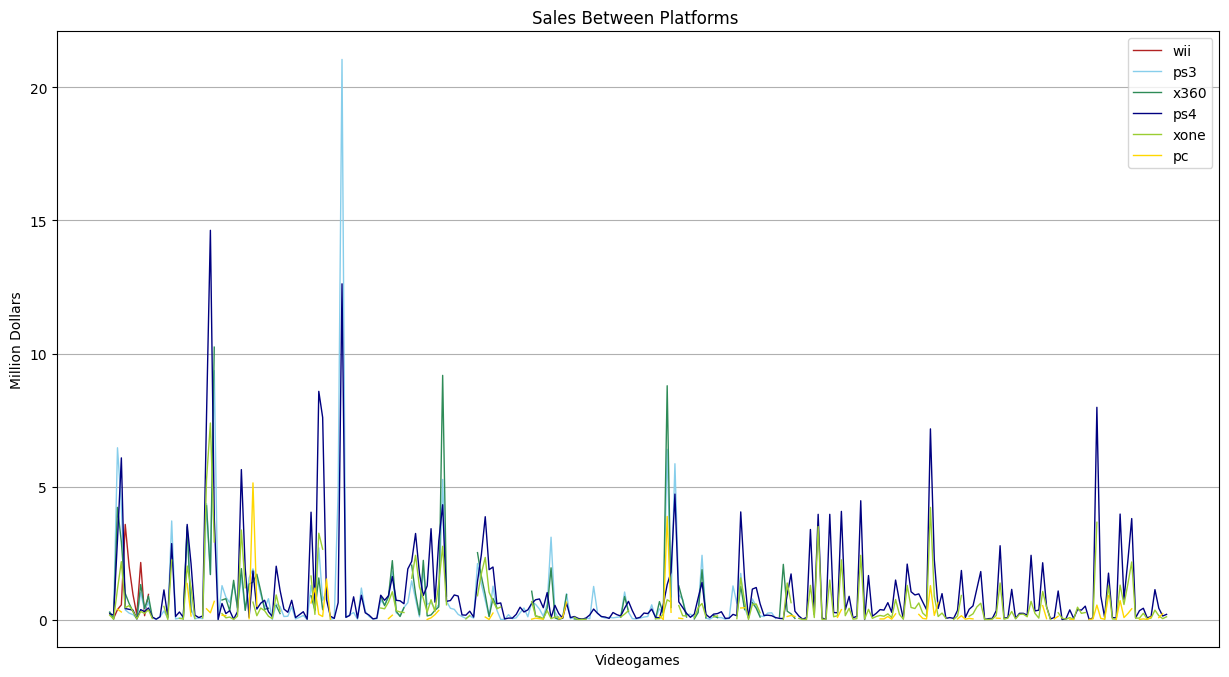

Los promedios de ventas por plataforma son:
Wii: 1.02
ps3: 0.87
x360: 1.13
ps4: 1.01
xone: 0.62
pc: 0.29


In [ ]:
# Generamos un nuevo 'df' con las consolas relevantes que tienen ventas en 2016 y han vendido a más de una plataforma
relevant_console_platforms = ['wii', 'ps3', 'x360', 'ps4', 'xone', 'pc']
df_platforms_count = df_relevant_platform_years.query(
    "platform in @relevant_console_platforms").groupby('name').agg({'platform': 'count'})
df_platforms_count_ps4 = df_relevant_platform_years.query(
    "platform in 'ps4'").groupby('name').agg({'platform': 'count'})

wii = df_relevant_platform_years.query("platform == 'wii'").groupby('name')[
    'total_sales'].sum()
ps3 = df_relevant_platform_years.query("platform == 'ps3'").groupby('name')[
    'total_sales'].sum()
x360 = df_relevant_platform_years.query("platform == 'x360'").groupby('name')[
    'total_sales'].sum()
ps4 = df_relevant_platform_years.query("platform == 'ps4'").groupby('name')[
    'total_sales'].sum()
xone = df_relevant_platform_years.query("platform == 'xone'").groupby('name')[
    'total_sales'].sum()
pc = df_relevant_platform_years.query("platform == 'pc'").groupby('name')[
    'total_sales'].sum()


df_game_consoles_sales = pd.concat(
    [wii, ps3, x360, ps4, xone, pc, df_platforms_count], axis='columns')
df_game_consoles_sales.columns = [
    'wii', 'ps3', 'x360', 'ps4', 'xone', 'pc', 'count']

df_game_consoles_sales = df_game_consoles_sales.query("ps4 > 0")
df_game_consoles_sales = df_game_consoles_sales.query("count > 1")
df_game_consoles_sales.drop_duplicates(inplace=True)
df_game_consoles_sales = df_game_consoles_sales.drop('count', axis=1)
df_game_consoles_sales.sort_values(by='name')

df_game_consoles_sales.plot(xticks=[], title='Sales Between Platforms ', xlabel='Videogames', ylabel='Million Dollars', kind='line',  figsize=[
                            15, 8], grid=True, linewidth=1, rot=90, color=['firebrick', 'skyblue', 'seagreen', 'navy', 'yellowgreen', 'gold'])
plt.show()


wii_average = df_game_consoles_sales['wii'].mean().round(2)
ps3_average = df_game_consoles_sales['ps3'].mean().round(2)
x360_average = df_game_consoles_sales['x360'].mean().round(2)
ps4_average = df_game_consoles_sales['ps4'].mean().round(2)
xone_average = df_game_consoles_sales['xone'].mean().round(2)
pc_average = df_game_consoles_sales['pc'].mean().round(2)

print('Los promedios de ventas por plataforma son:')
print(f'Wii: {wii_average}')
print(f'ps3: {ps3_average}')
print(f'x360: {x360_average}')
print(f'ps4: {ps4_average}')
print(f'xone: {xone_average}')
print(f'pc: {pc_average}')

Podemos observar en la gráfica que cuando el videojuego sale en varias plataformas el que tiene picos más altos en ventas es 'ps4' en la nueva generación, mientras que en la generación anterior 'ps3' y 'x360' tienen los picos muy similares excepto por el juego "Grand Thef Auto V" con ventas alrededor de 21 millones en 'ps3', pero aún así 'x360' fue lider en su generación.

## Géneros más rentables

In [ ]:
# Revisamos que generos ingresan mayores ventas como sus promedios
genre_total_sales = df_relevant_platform_years.groupby(
    'genre').agg({'total_sales': 'sum', 'name': 'count'})
genre_total_sales['average_sales'] = (
    genre_total_sales['total_sales'] / genre_total_sales['name']).round(2)
genre_total_sales.columns = ['total_sales', 'offer', 'average_sales']
genre_total_sales.sort_values(by='average_sales', ascending=False)

,total_sales,offer,average_sales
genre,,,
shooter,961.17,1213,0.79
platform,581.24,768,0.76
role-playing,852.55,1295,0.66
racing,677.59,1177,0.58
sports,1239.12,2168,0.57
action,1606.72,3002,0.54
fighting,381.85,727,0.53
misc,756.43,1631,0.46
simulation,377.73,830,0.46


Los géneros con mayor rentabilidad promedio son 'shooter', 'platform', 'role-playing' y 'racing'. Los de mayor ingreso fueron 'action' y 'sports', pero este resultado también se debe a su gran oferta. Los resultados pueden deberse a que estos géneros lograr hacer sentir más emociones en corto plazo, ya sea por la acción frenética o por las historias interesantes.

# Análisis por región

## Variaciones en ventas por región

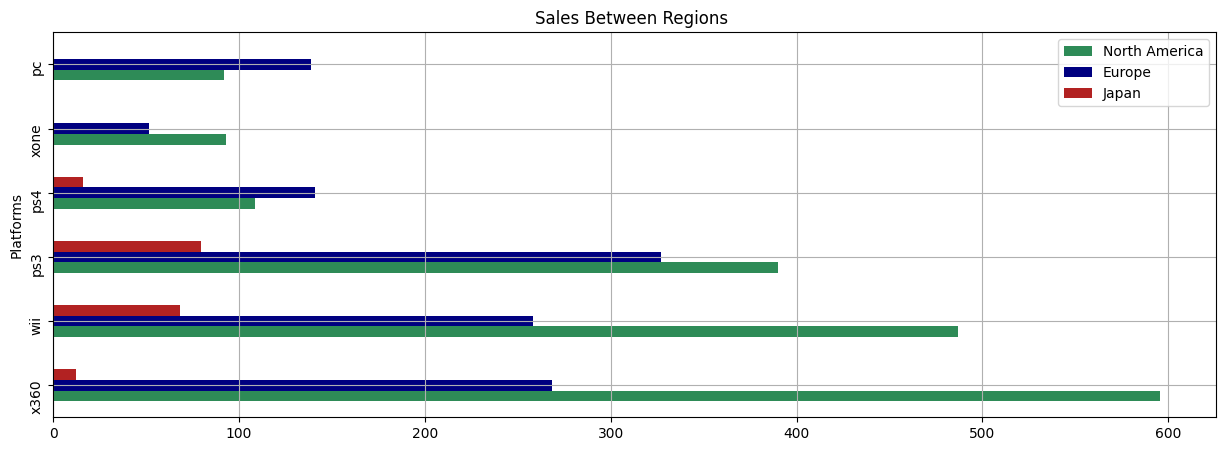

          North America  Europe  Japan
platform                              
x360             595.74  268.32  12.30
wii              486.87  258.32  68.28
ps3              390.13  327.21  79.41
ps4              108.74  141.09  15.96
xone              93.12   51.59   0.34
pc                92.08  138.66   0.17


In [ ]:
# Graficamos las ventas totales por plataforma y región
relevant_console_platforms = ['wii', 'ps3', 'x360', 'ps4', 'xone', 'pc']
df_region_sales = df_relevant_platform_years.query("platform in @relevant_console_platforms").groupby(
    'platform').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})
df_region_sales = df_region_sales.sort_values(by='na_sales', ascending=False)
df_region_sales.columns = ['North America', 'Europe', 'Japan']


df_region_sales.plot(title='Sales Between Regions ', xlabel='Platforms', ylabel='Million Dollars', kind='barh',  figsize=[
                     15, 5], grid=True, linewidth=3, rot=90, color=['seagreen', 'navy', 'firebrick'])
plt.show()

print(df_region_sales)

**Nota para el revisor: Cómo puedo ordenar el eje y?, quería ordenarlos por año de lanzamientos por ejemplo.**

Conclusiones:
- Japón: En esta región practicamente NO consumen videojuegos de 'pc' ni de 'xone'. También es la región con menores ingresos, teniendo en cuenta que es mucho menor en tamaño que las otras dos, apenas obtiene el 5% del mercado.
- Norte América: Es la principal fuente de ingresos de los videojuegos, ahí se lleva a cabo la mayoría del consumo en videojuegos del mundo actualmente (2016) con más del 57% del mercado en estas plataformas, solo perdió en 2 plataformas.
- Europa: Es un gran mercado económico para los videojuegos pero solo fue apenas mayor en las plataformas de 'pc' y 'ps4' con un porcentaje del 38%.


## Los 6 principales géneros por región

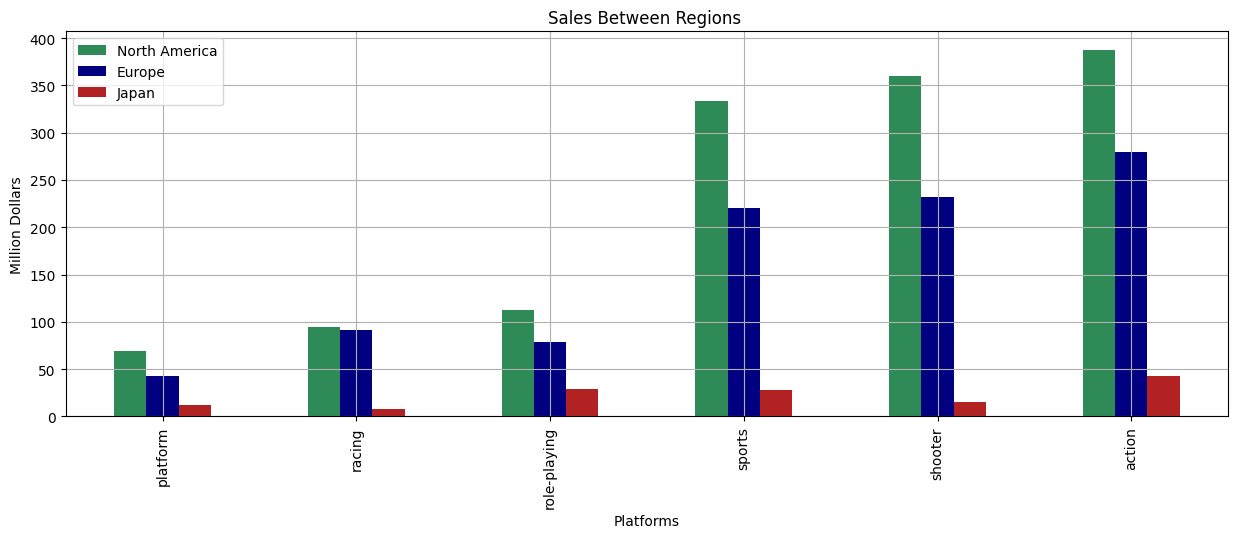

              North America  Europe  Japan
genre                                     
platform              69.62   42.33  12.36
racing                94.84   91.57   8.03
role-playing         112.75   79.10  28.59
sports               333.25  220.86  27.62
shooter              360.16  231.54  15.61
action               387.79  279.60  42.43


In [ ]:
# Graficamos las ventas totales por género y región
principal_6_genres = ['shooter', 'platform',
                      'role-playing', 'racing', 'sports', 'action']
relevant_console_platforms = ['wii', 'ps3', 'x360', 'ps4', 'xone', 'pc']
df_region_genre_sales = df_relevant_platform_years.query(
    "platform in @relevant_console_platforms and genre in @principal_6_genres").groupby('genre').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})
df_region_genre_sales = df_region_genre_sales.sort_values(by='na_sales')
df_region_genre_sales.columns = ['North America', 'Europe', 'Japan']

df_region_genre_sales.plot(title='Sales Between Regions ', xlabel='Platforms', ylabel='Million Dollars', kind='bar',  figsize=[
                           15, 5], grid=True, linewidth=3, rot=90, color=['seagreen', 'navy', 'firebrick'])
plt.show()

print(df_region_genre_sales)

Conclusiones:
- Japón: El 'role-playing' es el género que sorpresivamente mayormente se consume en esta región, seguido de los juegos de 'action'.
- Norte América: Hay una gran diferencia entre los 3 principales géneros consumidos en esta región en comparación de los demás, los cuales son 'action', 'shooter' y 'sports'.
- Europa: El comportamiento es practicamente el mismo que en Norte América, la pequeña diferencia es que en esta región los géneros 'shooter' y 'sports' se consumen casi por igual.


## Clasificaciones ESRB ¿Afectan?

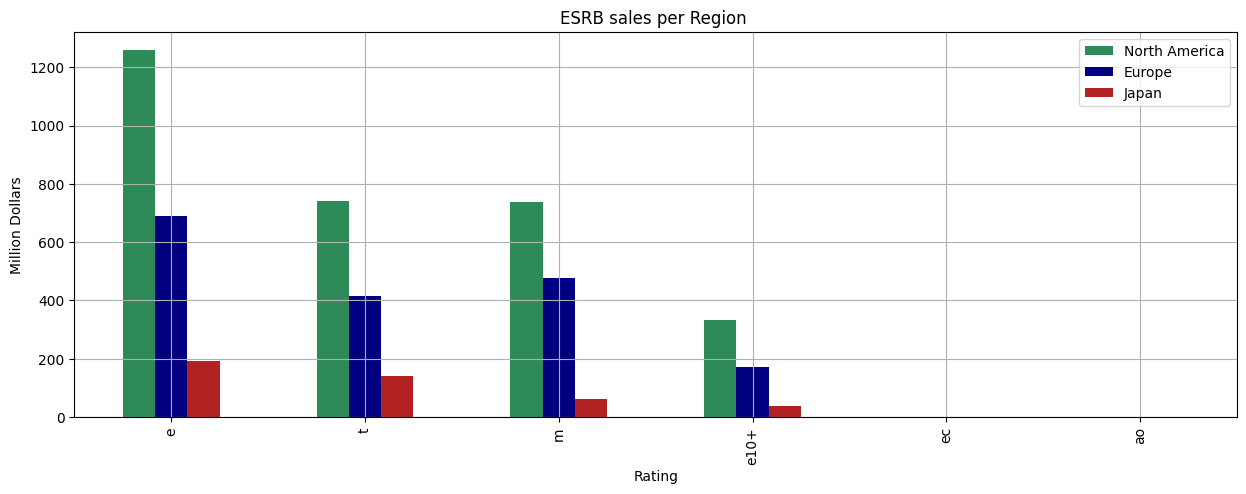

        North America  Europe   Japan
rating                               
e             1258.46  691.31  192.09
t              741.48  416.58  141.83
m              737.11  475.86   61.29
e10+           332.32  172.95   37.11
ec               1.53    0.11    0.00
ao               1.26    0.61    0.00


In [ ]:
# Graficamos el comportamiento de 'rating' por región
df_esrb_na_sales = df_relevant_platform_years.query(
    "rating != 'unknown' and rating != 'rp'").groupby(['rating']).agg({'na_sales': 'sum'})
df_esrb_eu_sales = df_relevant_platform_years.query(
    "rating != 'unknown' and rating != 'rp'").groupby(['rating']).agg({'eu_sales': 'sum'})
df_esrb_jp_sales = df_relevant_platform_years.query(
    "rating != 'unknown' and rating != 'rp'").groupby(['rating']).agg({'jp_sales': 'sum'})
df_esrb_region_sales = pd.concat(
    [df_esrb_na_sales, df_esrb_eu_sales, df_esrb_jp_sales], axis='columns')
df_esrb_region_sales.columns = ['North America', 'Europe', 'Japan']
df_esrb_region_sales = df_esrb_region_sales.sort_values(
    by='North America', ascending=False)

df_esrb_region_sales.plot(title='ESRB sales per Region ', xlabel='Rating', ylabel='Million Dollars', kind='bar',  figsize=[
                          15, 5], grid=True, linewidth=3, rot=90, color=['seagreen', 'navy', 'firebrick'])
plt.show()

print(df_esrb_region_sales)

Significado ESRB
- **e**: Everyone
- **t**: Teen
- **m**: Mature
- **ec**: Early Childhood
- **ao**: Adults Only

Conclusiones:

No existe una afectación real por la clasificación ESRB por regiones dado que el consumo es proporcional con las ventas de cada región, sin embargo si afectan en sus ventas globales.
Por otro lado, parece que en Europa existe mayor demanda por clasificados 'mature' (m) que por la clasificación 'teen' (t), esto puede deberse a que quizás en europa existan más adultos que jovenes y niños.

# Prueba de hipótesis

## Prueba 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

Utilizaremos el criterio con 2 muestras independientes, ya que una no depende de la otra.

In [ ]:
# hipótesis nula:
h0 = 'las calificaciones promedio de los usuarios de Xbox One y PC son estadísticamente iguales.'
# h1 hipótesis alternativa:
h1 = 'las calificaciones promedio de los usuarios de Xbox One y PC son significativamente diferentes.'
# Nivel de confianza: 95%
alpha = 0.05


# Tomamos las muestras de ingresos de 70 usuarios de cada plataforma
df_relevant_platform_years['average_score'] = (
    df_relevant_platform_years['critic_score'] + df_relevant_platform_years['user_score']) / 2
df_xone_average_score = df_relevant_platform_years.query(
    "platform == 'xone' and average_score > 0").groupby('name').agg({'average_score': 'mean'}).sample(70)
df_pc_average_score = df_relevant_platform_years.query(
    "platform == 'pc' and average_score > 0").groupby('name').agg({'average_score': 'mean'}).sample(70)

/tmp/ipykernel_71/2939107279.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant_platform_years['average_score'] = (df_relevant_platform_years['critic_score'] + df_relevant_platform_years['user_score']) /2


In [57]:
# Prueba las hipótesis
sample_xone = df_xone_average_score['average_score']
sample_pc = df_pc_average_score['average_score']

statistic, pvalue = st.levene(sample_xone, sample_pc)
results = st.ttest_ind(sample_xone, sample_pc, equal_var=statistic)

print('statistic:', statistic)
print('valor p: ', results.pvalue)
if results.pvalue < alpha:
    print(f"Rechazamos la hipótesis nula, {h1}")
else:
    print(f"No podemos rechazar la hipótesis nula, {h0} ")

statistic: 0.044560067942967296
valor p:  0.003568399885908009
Rechazamos la hipótesis nula, las calificaciones promedio de los usuarios de Xbox One y PC son significativamente diferentes.


## Prueba 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

In [ ]:
# hipótesis nula:
h0 = 'las calificaciones promedio de los generos acción y deportes son estadísticamente iguales.'
# h1 hipótesis alternativa:
h1 = 'las calificaciones promedio de los generos acción y deportes son significativamente diferentes.'
# Nivel de confianza: 95%
alpha = 0.05


# Tomamos las muestras de ingresos de 70 usuarios de cada plataforma
df_relevant_platform_years['average_score'] = (
    df_relevant_platform_years['critic_score'] + df_relevant_platform_years['user_score']) / 2
df_action_average_score = df_relevant_platform_years.query(
    "genre == 'action' and average_score > 0").groupby('name').agg({'average_score': 'mean'}).sample(100)
df_sports_average_score = df_relevant_platform_years.query(
    "genre == 'sports' and average_score > 0").groupby('name').agg({'average_score': 'mean'}).sample(100)

/tmp/ipykernel_71/770468384.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant_platform_years['average_score'] = (df_relevant_platform_years['critic_score'] + df_relevant_platform_years['user_score']) /2


In [59]:
sample_1 = df_action_average_score['average_score']
sample_2 = df_sports_average_score['average_score']
st.levene(sample_1, sample_2)

LeveneResult(statistic=0.1414225528151725, pvalue=0.7072735042991227)

In [60]:
# Prueba las hipótesis
sample_action = df_action_average_score['average_score']
sample_sports = df_sports_average_score['average_score']

statistic, pvalue = st.levene(sample_action, sample_sports)
results = st.ttest_ind(sample_action, sample_sports, equal_var=statistic)

print('statistic:', statistic)
print('valor p: ', results.pvalue)
if results.pvalue < alpha:
    print(f"Rechazamos la hipótesis nula, {h1}")
else:
    print(f"No podemos rechazar la hipótesis nula, {h0} ")

statistic: 0.1414225528151725
valor p:  0.2648936439752662
No podemos rechazar la hipótesis nula, las calificaciones promedio de los generos acción y deportes son estadísticamente iguales. 


# Conclusión general

Comportamiento global
- El promedio de vida de cada plataforma en promedio son 9 años y medio.
- Las críticas si están correlacionadas con el éxito en ventas de cada videojuego.
- El género "shooter" y "platform" son en promedio los más rentables.
- La clasificación ESRB sí tiene correlación con las ventas globales, siendo la clasificación 'Everyone (E)' la más vendida siguiendo por la clasificación 'Teen (T)', esto se debe por razones obvias a que la clasificación 'E' engloba a todo el mercado y a partir de ahí se va seccionando cada vez en mercados más pequeños.

Hipótesis
- Si existe una diferencia significativa entre las calificaciones de los usuarios en las plataformas Xbox One y PC.
- No hay diferencia significativa en las calificaciones promedio de los generos acción y deportes. 

¿Que videojuego tiene mayor probabilidad de tener éxito en ventas en los próximos años? 
- Norte América: Un videojuego que este disponible por lo menos para **xone** de género **shooter** y con clasificación **Everyone (E)**.
- Europa: Un videojuego que este disponible por lo menos para **ps4** de género **action** y con clasificación **Everyone (E)**.
- Japón: Un videojuego que esté disponible por lo menos para **ps4** de género **role-playing** y con clasificación **Everyone (E)**.